# 군집화 (Clustering)

## 군집화의 정의
군집화
- 유사한 속성을 갖는 데이터들을 묶어 전체 데이터를 몇 개의 군집으로 나누는 것

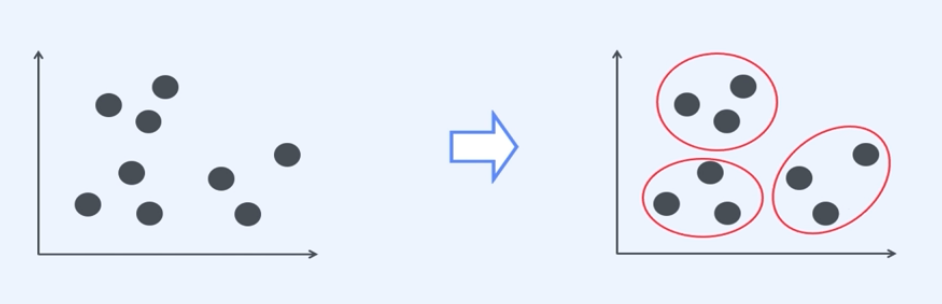

### Classification (분류) vs Clustering (군집화)
- 분류 (Classification)
  - Supervised Learning (지도학습)
  - 소속 집단의 정보를 알고있는 상태
  - Label이 있는 데이터를 나누는 방법
- 군집화 (Clustering)
  - Unsupervised Learning (비지도학습)
  - 소속 집단의 정보를 모르고 있는 상태
  - Label이 없는 데이터를 나누는 방법

### 군집 분석의 종류
1. 계층적(Hierarchical) 군집화
2. 비계층적(Non-Hierarchical) 군집화

## 계층적 군집화
- 개체들을 가까운 집단부터 묶어 나가는 방식
- 유사한 개체들이 결합되는 dendrogram 생성
- Cluster들은 sub-cluster를 갖고 있음
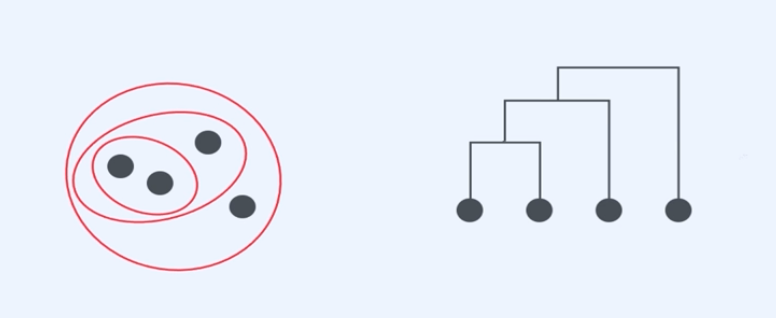

계층적 군집화도 거리에 따라 데이터를 묶음  

<거리의 종류>
- 유클리드 거리
- 맨해튼 거리
- 표준화 거리
- 민콥스키 거리

### 계층적 군집화 종류
계층적 군집화의 종류는 클러스터간의 거리 측정 방법에 따라 달라짐    
1. 최단 연결법
  - 군집간의 가장 가까운 데이터의 거리가 새로운 거리가 됨
  - $distance_{(uv)w} = min(distance_{uw}, distance_{vw})$
  - 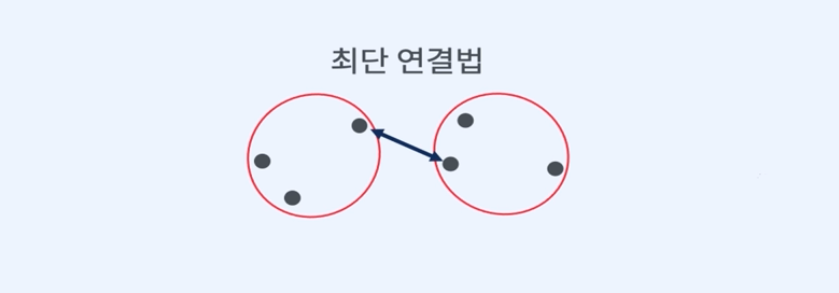
2. 최장 연결법
  - 군집간의 가장 먼 데이터의 거리가 새로운 거리가 됨
  - $distance_{(uv)w} = max(distance_{uw}, distance_{vw})$
  - 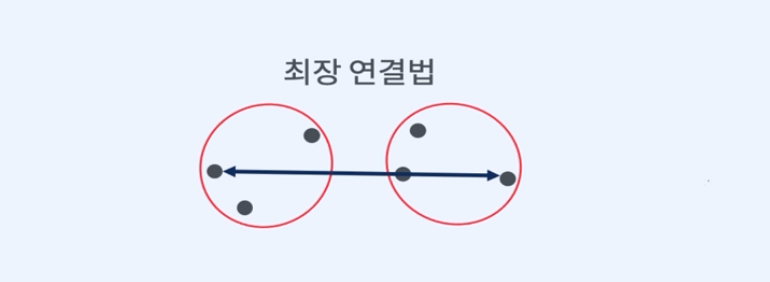
3. 평균 연결법
  - 군집간의 데이터들의 거리의 평균이 새로운 거리가 됨
  - $distance_{(UV)W} = {\sum_{x_{i}\in(U,V)}{\sum_{x_{j}\in(W)}}distance(x_{i}, x_{j})} \over {n_{(UV)n_W}}$
  - 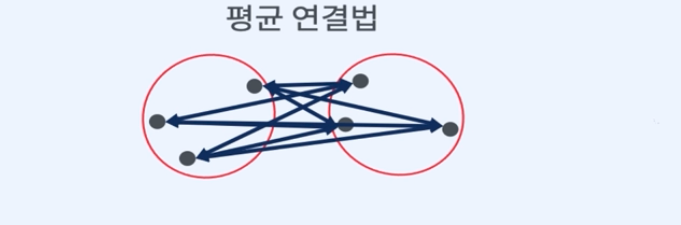
4. 중심 연결법
  - 군집의 중심이 새로운 거리가 됨
  - $distance(G1, G2) = ||\bar{x_{1}} - \bar{x_{2}}||$
  - 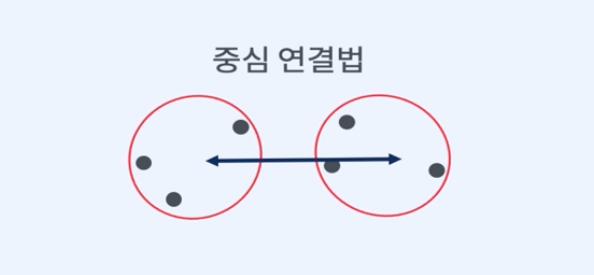

### 최단 연결법 예시 실습

|데이터|(x1, x2)|
|---|---|
|A|(1, 5)|
|B|(2, 4)|
|C|(4, 6)|
|D|(4, 3)|
|E|(5, 3)|

유클리드 거리를 통한 거리 계산

|거리|A|B|C|D|E|
|---|---|---|---|---|---|
|A|0|||||
|B|2|0||||
|C|10|8|0|||
|D|13|5|9|0||
|E|20|10|10|**1**|0|  

확인해보면 D와 E 사이의 거리가 1로 가장 가까우므로 (D, E)를 군집으로 묶음   

|거리|A|B|C|(D, E)|  
|---|---|---|---|:---:|
|A|0||||
|B|**2**|0|||
|C|10|8|0||
|(D, E)|13|5|9|0|   

D, E를 군집화 하였으므로 각 데이터마다 D or E 와의 거리 중 더 가까운 거리를 채택함  
> $dist(A, (D,E)) = min(dist(A, D), dist(A, E))$  

그 다음으로 가까운 거리는 2인 A와 B 사이의 거리이므로 (A, B)를 군집으로 묶음  

|거리|(A, B)|C|(D, E)|
|---|:---:|---|:---:|
|(A, B)|0|||
|C|8|0||
|(D, E)|5|9|0|  

(A, B)를 군집화하였으므로 $dist(A, (D, E))$ 와 $dist(B, (D, E))$ 중 더 작은 값을 $dist((A,B), (D, E))$로 선택 -> $dist(B, (D, E))$ 값인 5가 선택됨

군집화가 완료되었으므로 군집화된 내용을 dendrogram으로 나타내면 다음과 같음  
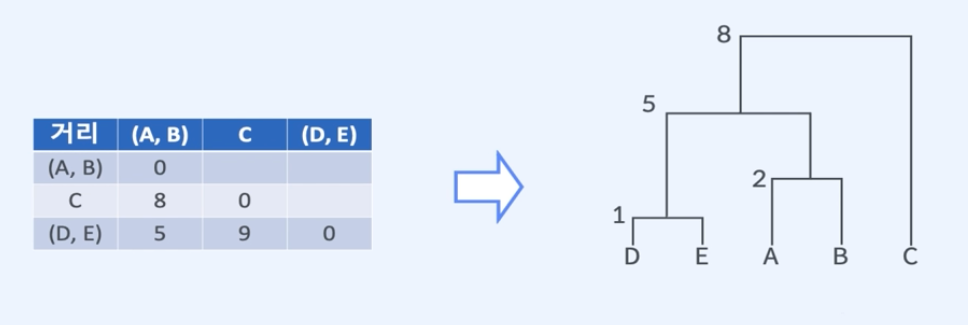  
이 때 dendrogram의 높이는 데이터 간의 거리가 됨

이렇게 dendrogram으로 나타낸 데이터 군집을 가지고 군집을 여러 개로 나누려면 주어진 군집의 개수에 맞게 그래프를 선으로 잘라 데이터를 나눌 수 있음  

**2개 cluster**  
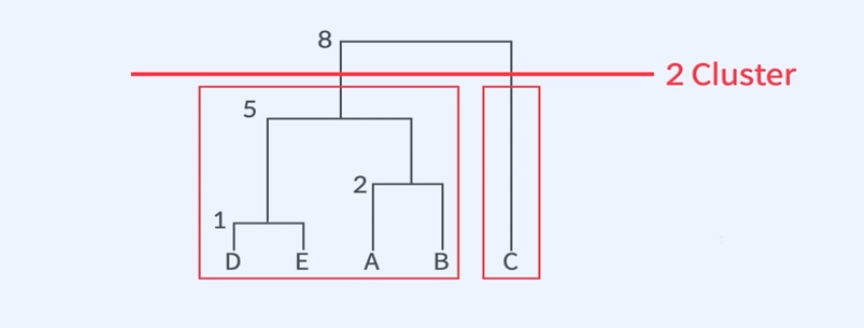


**3개 Cluster**  
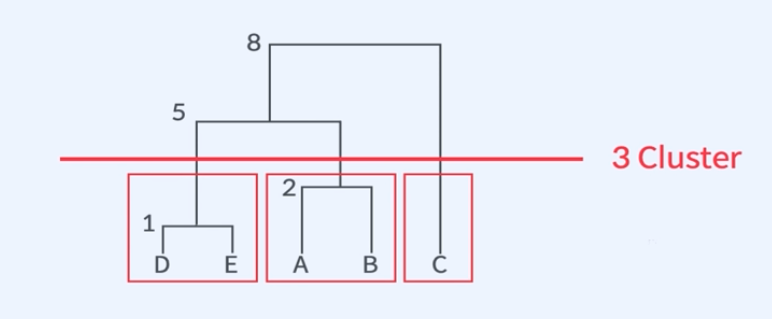

## 군집화 평가

### 좋은 Cluster  
- 군집 내 유사도를 최대화 (거리를 최소화)
- 군집 간 유사도를 최소화 (거리를 최대화)

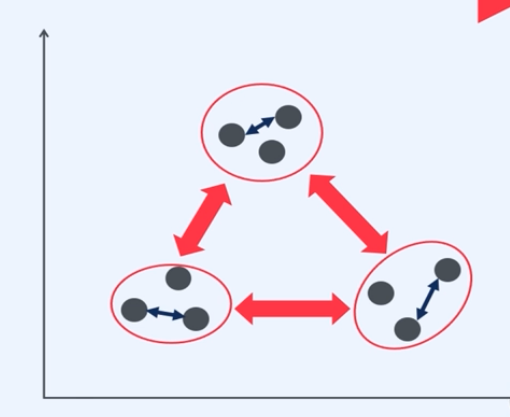


### 군집 결과 평가
**내부 평가**  
군집된 결과 그 자체를 놓고 평가하는 방식  

내부 평가 방법  
1. Dunn Index
  - 군집과 군집 사이의 거리가 클수록, 군집내 데이터 간 거리가 작을 수록 좋은 모델 -> DI 가 큰 모델
  - $DI = {{군집과 군집 사이의 거리 중 최소값} \over {군집내 데이터 간 거리 중 최대값}}s$
  - 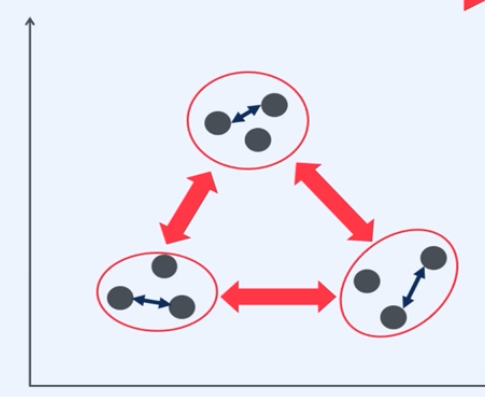
2. 실루엣 (Silouette)
  - $S = {{b(i) - a(i)} \over {max{a(i), b(i)}}}$
  - 군집 내 응집도 (cohesion)
    - $a(i)$: 데이터 $x_i$와 동일한 군집 내의 나머지 데이터들과의 평균 거리
  - 군집 간 분리도 (separation)
    - $b(i)$: 데이터 $x_i$와 가장 가까운 군집 내의 모든 데이터들과의 평균 거리

**외부 평가**  
군집화에 사용되지 않는 데이터로 평가하는 방식  
